# MIMIC-III Introduction Workshop With Tasks

### By Zahoor Ahmad

In this section, we'll explore the data of a single patient, before building a simple predictive model.

# PART 1: Exploring the trajectory of a single patient

### Import Python libraries

We first need to import some tools for working with data in Python. 
- NumPy is for working with numbers
- Pandas is for analysing data
- MatPlotLib is for making plots
- Sqlite3 to connect to the database

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

### Connect to the database

- We can use the sqlite3 library to connect to the MIMIC database
- **Update the file path to your local folder!!**
- Once the connection is established, we'll run a simple SQL query.

In [157]:
# Connect to the MIMIC database
conn = sqlite3.connect('..\data\mimicdata.sqlite')

In [158]:
# Create our test query
test_query = """
SELECT subject_id, hadm_id, admittime, dischtime, admission_type, diagnosis
FROM admissions
"""

In [159]:
# Run the query and assign the results to a variable
test = pd.read_sql_query(test_query,conn)

In [160]:
# Display the first few rows
test.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,DIAGNOSIS
0,40036,198489,2141-08-01 23:46:00,2141-08-09 19:15:00,EMERGENCY,SEPSIS
1,40080,162107,2106-05-31 16:43:00,2106-06-05 01:18:00,EMERGENCY,CONGESTIVE HEART FAILURE
2,40084,195762,2173-01-31 22:11:00,2173-02-05 01:31:00,EMERGENCY,INTRACRANIAL HEMORRHAGE;OPEN FX
3,40116,157106,2150-02-19 00:12:00,2150-03-11 13:58:00,EMERGENCY,GASTROINTESTINAL BLEED
4,40120,146466,2120-01-27 20:41:00,2120-02-12 17:14:00,EMERGENCY,CONGESTIVE HEART FAILURE


### Load the chartevents data

- The chartevents table contains data charted at the patient bedside. It includes variables such as heart rate, respiratory rate, temperature, and so on.
- We'll begin by loading the chartevents data for a single patient.

In [161]:
query = """
SELECT de.icustay_id
  , round((strftime('%s',de.charttime)-strftime('%s',ie.intime))/60.0/60.0+0.5) as HOURS
  , di.label
  , de.value
  , de.valuenum
  , de.uom
FROM chartevents de
INNER join d_items di
ON de.itemid = di.itemid
INNER join icustays ie
ON de.icustay_id = ie.icustay_id
WHERE de.icustay_id = 252522
ORDER BY charttime;
"""

ce = pd.read_sql_query(query,conn)


# OPTION 2: load chartevents from a CSV file
# ce = pd.read_csv('data/example_chartevents.csv', index_col='HOURSSINCEADMISSION')

In [162]:
# Preview the data
# Use 'head' to limit the number of rows returned
ce.head()

,ICUSTAY_ID,HOURS,LABEL,VALUE,VALUENUM,UOM
0,252522,1.0,Heart Rate,90,90.0,bpm
1,252522,1.0,Non Invasive Blood Pressure systolic,104,104.0,mmHg
2,252522,1.0,Non Invasive Blood Pressure diastolic,63,63.0,mmHg
3,252522,1.0,Non Invasive Blood Pressure mean,74,74.0,mmHg
4,252522,1.0,Respiratory Rate,28,28.0,insp/min


### Review the patient's heart rate

- We can select individual columns using the column name. 
- For example, if we want to select just the label column, we write **```ce.LABEL```** or alternatively **```ce['LABEL']```**

In [163]:
# Select a single column from the chartevents data we extracted 
ce['LABEL']

0                                     Heart Rate
1           Non Invasive Blood Pressure systolic
2          Non Invasive Blood Pressure diastolic
3               Non Invasive Blood Pressure mean
4                               Respiratory Rate
5                    O2 saturation pulseoxymetry
6                                     Heart Rate
7                        Heart rate Alarm - High
8                         Heart Rate Alarm - Low
9                               Respiratory Rate
10                   O2 saturation pulseoxymetry
11      Non-Invasive Blood Pressure Alarm - High
12       Non-Invasive Blood Pressure Alarm - Low
13                        Temperature Fahrenheit
14      O2 Saturation Pulseoxymetry Alarm - High
15       O2 Saturation Pulseoxymetry Alarm - Low
16                             Resp Alarm - High
17                              Resp Alarm - Low
18                              SpO2 Desat Limit
19                            Richmond-RAS Scale
20                  

- In a similar way, we can select rows from data using indexes. 
- For example, to select rows where the label is equal to 'Heart Rate', we would create an index using **```[ce.LABEL=='Heart Rate']```** 

In [164]:
# Select just the heart rate rows using an index
ce[ce.LABEL=='Heart Rate']

,ICUSTAY_ID,HOURS,LABEL,VALUE,VALUENUM,UOM
0,252522,1.0,Heart Rate,90,90.0,bpm
6,252522,1.0,Heart Rate,86,86.0,bpm
24,252522,2.0,Heart Rate,94,94.0,bpm
30,252522,3.0,Heart Rate,91,91.0,bpm
36,252522,4.0,Heart Rate,95,95.0,bpm
58,252522,5.0,Heart Rate,90,90.0,bpm
67,252522,6.0,Heart Rate,93,93.0,bpm
77,252522,7.0,Heart Rate,97,97.0,bpm
88,252522,8.0,Heart Rate,94,94.0,bpm
95,252522,9.0,Heart Rate,96,96.0,bpm


#### Plot 1: How did the patients heart rate change over time?

- Using the methods described above to select our data of interest, we can create our x and y axis values to create a time series plot of heart rate.

In [165]:
# Which time stamps have a corresponding heart rate measurement?
print (ce.index[ce.LABEL=='Heart Rate'])

Int64Index([   0,    6,   24,   30,   36,   58,   67,   77,   88,   95,
            ...
            1051, 1057, 1069, 1092, 1098, 1104, 1122, 1128, 1134, 1140],
           dtype='int64', length=116)


Text(0.5,1,'Heart rate over time from admission to the intensive care unit')

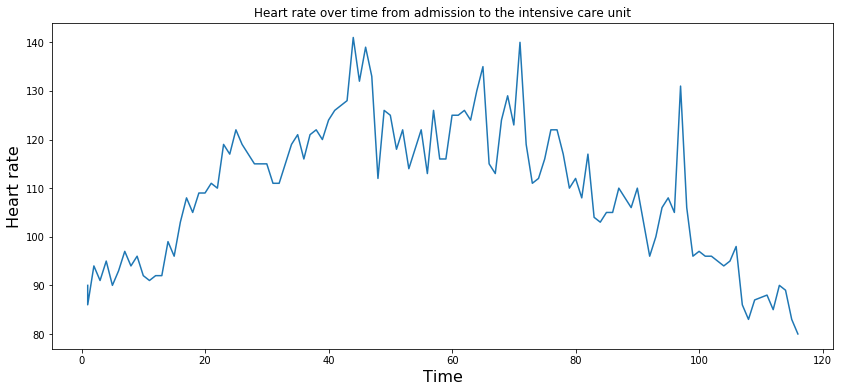

In [166]:
# Set x equal to the times
x_hr = ce.HOURS[ce.LABEL=='Heart Rate']

# Set y equal to the heart rates
y_hr = ce.VALUENUM[ce.LABEL=='Heart Rate']

# Plot time against heart rate
plt.figure(figsize=(14, 6))
plt.plot(x_hr,y_hr)


plt.xlabel('Time',fontsize=16)
plt.ylabel('Heart rate',fontsize=16)
plt.title('Heart rate over time from admission to the intensive care unit')

#### Task 1

* What is happening to this patient's heart rate?
* Plot respiratory rate over time for the patient.
* Is there anything unusual about the patient's respiratory rate?


# Exercise 1 here



###  a): What is happening to this patient's heart rate?
Ans: The Heart Rate of this patiante was fluctuating between 80 and 140, at the starting hours it was near to 80 and then going to increase but with fluctations(ups and downs not continuously) and between 50 and 70 this was the peak value while onward 110 decreased to normall.

### b): Plot respiratory rate over time for the patient.


Text(0.5,1,'Respiratory rate over time from admission to the intensive care unit')

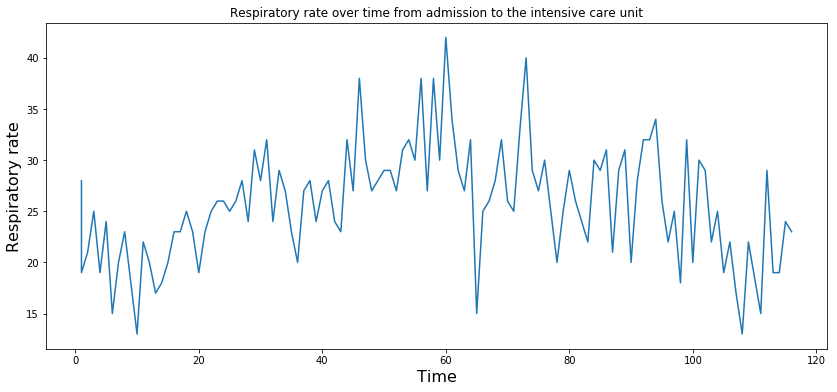

In [167]:
# Set x equal to the times
x_hr = ce.HOURS[ce.LABEL=='Respiratory Rate']

# Set y equal to the heart rates
y_hr = ce.VALUENUM[ce.LABEL=='Respiratory Rate']

# Plot time against heart rate
plt.figure(figsize=(14, 6))
plt.plot(x_hr,y_hr)


plt.xlabel('Time',fontsize=16)
plt.ylabel('Respiratory rate',fontsize=16)
plt.title('Respiratory rate over time from admission to the intensive care unit')

### c): Is there anything unusual about the patient's respiratory rate?
The normal respiration rate for an adult at rest is 12 to 20 breaths per minute. A respiration rate under 12 or over 25 breaths per minute while resting is considered abnormal.
While very few hours it was under normal curve but almost above the normal threshold (20).


### Did the patient's vital signs breach any alarm thresholds?

- Alarm systems in the intensive care unit are commonly based on high and low thresholds defined by the carer.
- False alarms are often a problem and so thresholds may be set arbitrarily to reduce alarms.
- As a result, alarm settings carry limited information.

#### Plot 2: Respiratory rate and alarms

(0, 55)

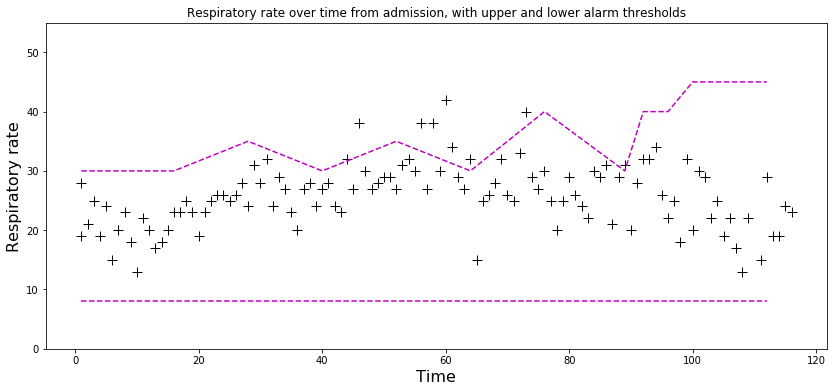

In [168]:
plt.figure(figsize=(14, 6))

plt.plot(ce.HOURS[ce.LABEL=='Respiratory Rate'], 
         ce.VALUENUM[ce.LABEL=='Respiratory Rate'],
         'k+', markersize=10, linewidth=4)

plt.plot(ce.HOURS[ce.LABEL=='Resp Alarm - High'], 
         ce.VALUENUM[ce.LABEL=='Resp Alarm - High'],
         'm--')

plt.plot(ce.HOURS[ce.LABEL=='Resp Alarm - Low'], 
         ce.VALUENUM[ce.LABEL=='Resp Alarm - Low'],
         'm--')

plt.xlabel('Time',fontsize=16)
plt.ylabel('Respiratory rate',fontsize=16)
plt.title('Respiratory rate over time from admission, with upper and lower alarm thresholds')
plt.ylim(0,55)


#### Task 2

- Based on the data, does it look like the alarms would have triggered for this patient?

###### Ans: Obviously, These alarms are triggered for the same patient. Look toward both figures the ups and downs are the same.


### What was the patient's level of consciousness?

- Glasgow Coma Scale (GCS) is a measure of consciousness.
- It is commonly used for monitoring patients in the intensive care unit. 
- It consists of three components: eye response; verbal response; motor response.

In [169]:
# Display the first few rows of the GCS eye response data
ce[ce.LABEL=='GCS - Eye Opening'].head()

,ICUSTAY_ID,HOURS,LABEL,VALUE,VALUENUM,UOM
20,252522,1.0,GCS - Eye Opening,Spontaneously,4.0,
55,252522,4.0,GCS - Eye Opening,Spontaneously,4.0,
92,252522,8.0,GCS - Eye Opening,To Speech,3.0,
142,252522,12.0,GCS - Eye Opening,To Speech,3.0,
180,252522,16.0,GCS - Eye Opening,Spontaneously,4.0,


#### Plot 3: GCS over time

(10, 165)

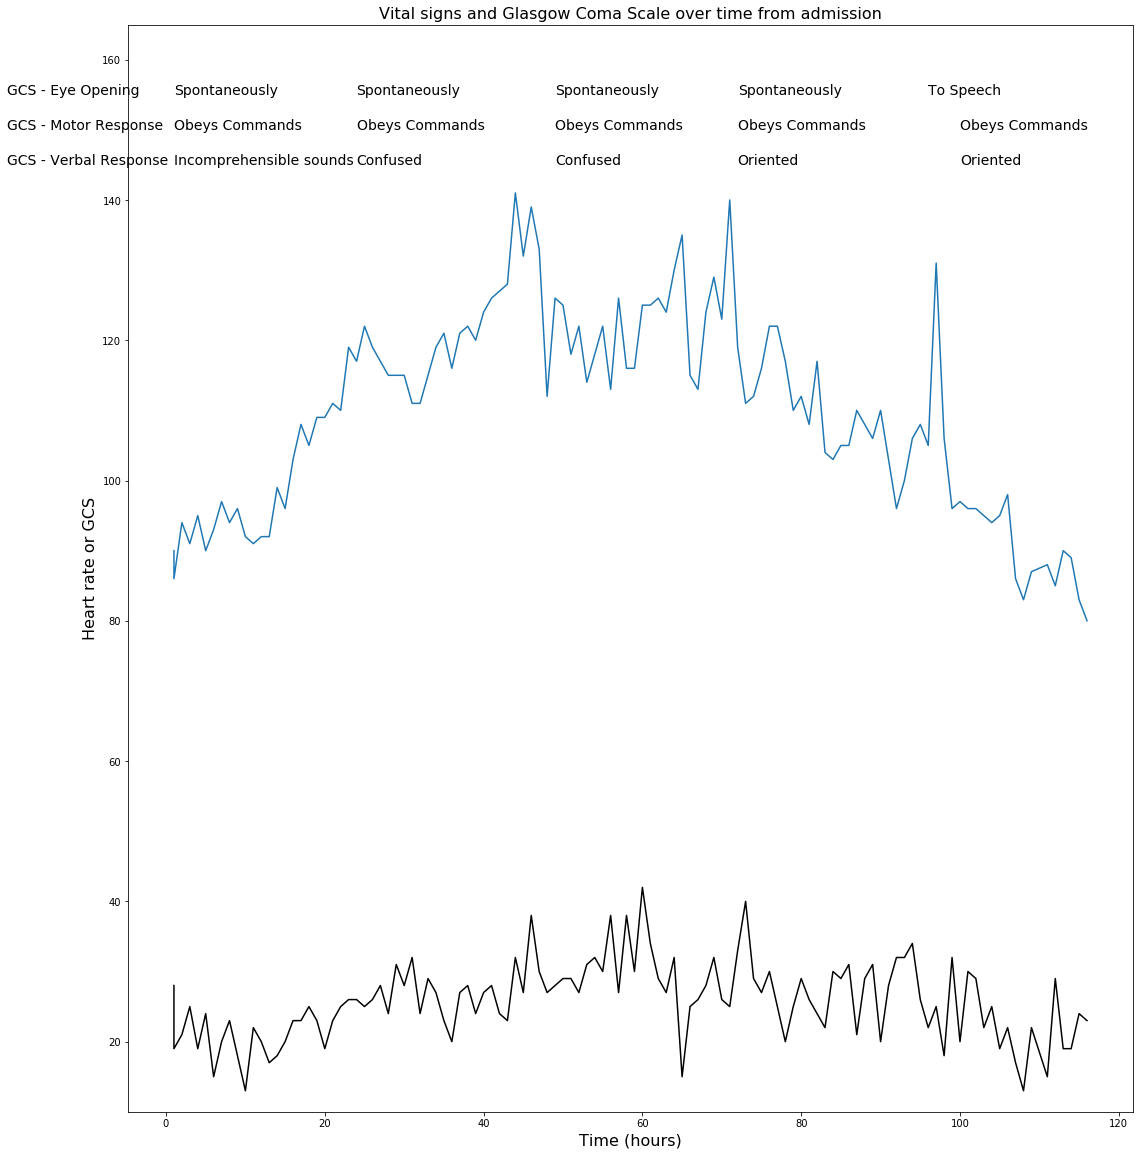

In [170]:
# Prepare the size of the figure
plt.figure(figsize=(18, 20))

# Set x equal to the times
x_hr = ce.HOURS[ce.LABEL=='Heart Rate']

# Set y equal to the heart rates
y_hr = ce.VALUENUM[ce.LABEL=='Heart Rate']


plt.plot(x_hr,y_hr)

plt.plot(ce.HOURS[ce.LABEL=='Respiratory Rate'], 
         ce.VALUENUM[ce.LABEL=='Respiratory Rate'],
         'k', markersize=6)

# Add a text label to the y-axis
plt.text(-20,155,'GCS - Eye Opening',fontsize=14)
plt.text(-20,150,'GCS - Motor Response',fontsize=14)
plt.text(-20,145,'GCS - Verbal Response',fontsize=14) 
# plt.text(-20, 140, 'GCS Values', fontsize=20)

# Iterate over list of GCS labels, plotting around 1 in 10 to avoid overlap
for i, txt in enumerate(ce.VALUE[ce.LABEL=='GCS - Eye Opening'].values):
    if np.mod(i,6)==0 and i < 65:
        plt.annotate(txt, (ce.HOURS[ce.LABEL=='GCS - Eye Opening'].values[i],155),fontsize=14)
        
for i, txt in enumerate(ce.VALUE[ce.LABEL=='GCS - Motor Response'].values):
    if np.mod(i,6)==0 and i < 65:
        plt.annotate(txt, (ce.HOURS[ce.LABEL=='GCS - Motor Response'].values[i],150),fontsize=14)

for i, txt in enumerate(ce.VALUE[ce.LABEL=='GCS - Verbal Response'].values):
    if np.mod(i,6)==0 and i < 65:
        plt.annotate(txt, (ce.HOURS[ce.LABEL=='GCS - Verbal Response'].values[i],145),fontsize=14)

plt.title('Vital signs and Glasgow Coma Scale over time from admission',fontsize=16)

plt.xlabel('Time (hours)',fontsize=16)
plt.ylabel('Heart rate or GCS',fontsize=16)
plt.ylim(10,165)


#### Task 3

- How is the patient's consciousness changing over time?

### Task # 3 Start

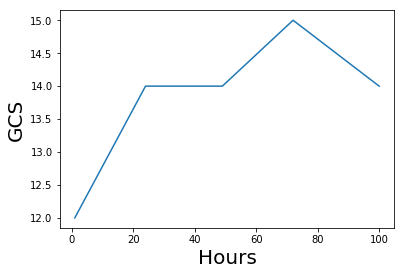

In [171]:
A = []
B = []
C = []
time = []


for i, txt in enumerate(ce.VALUENUM[ce.LABEL=='GCS - Eye Opening'].values):
    if np.mod(i,6)==0 and i < 65:
            A.append(txt)
for i, txt in enumerate(ce.VALUENUM[ce.LABEL=='GCS - Motor Response'].values):
    if np.mod(i,6)==0 and i < 65:
        B.append(txt)
for i, txt in enumerate(ce.VALUENUM[ce.LABEL=='GCS - Verbal Response'].values):
    if np.mod(i,6)==0 and i < 65:
        C.append(txt)
for i, txt in enumerate(ce.HOURS[ce.LABEL=='GCS - Verbal Response'].values):
    if np.mod(i,6)==0 and i < 65:
        time.append(txt)
        
gcs = [a+b+c for a,b,c in zip(A,B,C)]

# Prepare the size of the figure
plt.figure(figsize=(6, 4))

plt.xlabel('Hours', fontsize= 20)
plt.ylabel('GCS', fontsize= 20)

plt.plot(time,gcs)

#### * GCS = Eye opening + Verbal Response + Motor Response
A Coma Score of 13 or higher correlates with a mild brain injury, 9 to 12 is a moderate injury and 8 or less a severe brain injury or said to be in coma.
In this case only fully awaked at 70(between 60 and 80) only.

### Task 3 End.

## What about the patient's other vital signs?

We can visualise on a single plot several vital signs for out patient.

#### Plot 4: Were the patient's other vital signs stable?

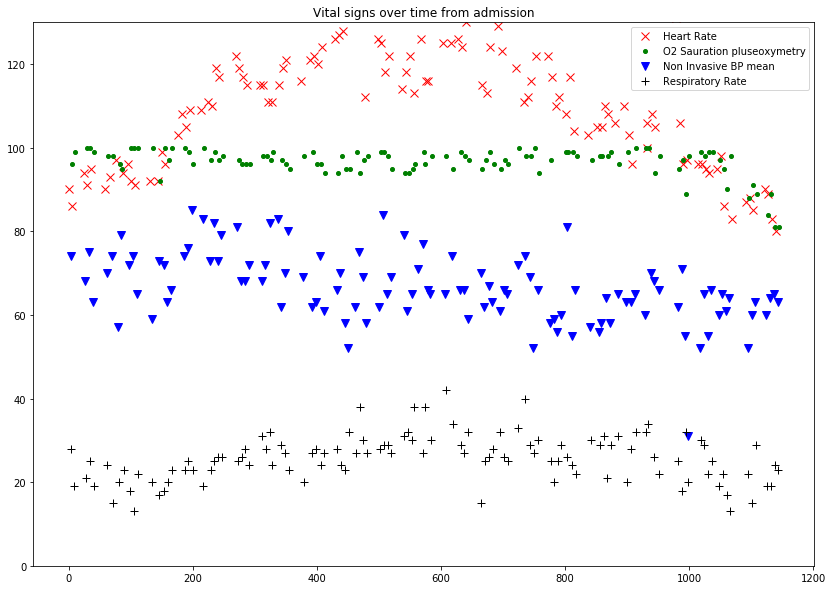

In [172]:
plt.figure(figsize=(14, 10))

plt.plot(ce.index[ce.LABEL=='Heart Rate'], 
         ce.VALUENUM[ce.LABEL=='Heart Rate'],
         'rx', markersize=8, label='Heart Rate')

plt.plot(ce.index[ce.LABEL=='O2 saturation pulseoxymetry'], 
         ce.VALUENUM[ce.LABEL=='O2 saturation pulseoxymetry'], 
         'g.', markersize=8, label='O2 Sauration pluseoxymetry')

plt.plot(ce.index[ce.LABEL=='Non Invasive Blood Pressure mean'], 
         ce.VALUENUM[ce.LABEL=='Non Invasive Blood Pressure mean'], 
         'bv', markersize=8, label='Non Invasive BP mean')

plt.plot(ce.index[ce.LABEL=='Respiratory Rate'], 
         ce.VALUENUM[ce.LABEL=='Respiratory Rate'], 
         'k+', markersize=8, label='Respiratory Rate')

plt.title('Vital signs over time from admission')
plt.ylim(0,130)
plt.legend()

## Laboratory measurements

Using Pandas 'read_csv function' again, we'll now load the labevents data.
This data corresponds to measurements made in a laboratory - usually on a sample of patient blood. 

In [173]:
# OPTION 1: load labevents data using the database connection
query = """
SELECT de.subject_id
  , de.charttime
  , di.label, de.value, de.valuenum
  , de.uom
FROM labevents de
INNER JOIN d_labitems di
  ON de.itemid = di.itemid
where de.subject_id = 40080
"""

le = pd.read_sql_query(query,conn)

# OPTION 2: load labevents from the CSV file
# le = pd.read_csv('data/example_labevents.csv', index_col='HOURSSINCEADMISSION')

In [174]:
# preview the labevents data
le.head()

,SUBJECT_ID,CHARTTIME,LABEL,VALUE,VALUENUM,UOM
0,40080,2106-05-31 13:18:00,ALANINE AMINOTRANSFERASE (ALT),10,10.0,IU/L
1,40080,2106-05-31 13:18:00,ALBUMIN,2.5,2.5,g/dL
2,40080,2106-05-31 13:18:00,ALKALINE PHOSPHATASE,126,126.0,IU/L
3,40080,2106-05-31 13:18:00,ANION GAP,12,12.0,mEq/L
4,40080,2106-05-31 13:18:00,ASPARATE AMINOTRANSFERASE (AST),28,28.0,IU/L


In [175]:
# preview the ioevents data
le[le.LABEL=='HEMOGLOBIN']

,SUBJECT_ID,CHARTTIME,LABEL,VALUE,VALUENUM,UOM
23,40080,2106-05-31 13:18:00,HEMOGLOBIN,9.1,9.1,g/dL
40,40080,2106-06-02 03:31:00,HEMOGLOBIN,8.8,8.8,g/dL
71,40080,2106-06-03 03:36:00,HEMOGLOBIN,8.2,8.2,g/dL
105,40080,2106-06-04 03:43:00,HEMOGLOBIN,8.2,8.2,g/dL
150,40080,2106-06-01 03:38:00,HEMOGLOBIN,8.3,8.3,g/dL
214,40080,2106-06-05 04:57:00,HEMOGLOBIN,8.5,8.5,g/dL


#### PLot 5: hemoglobin and hematocrit values

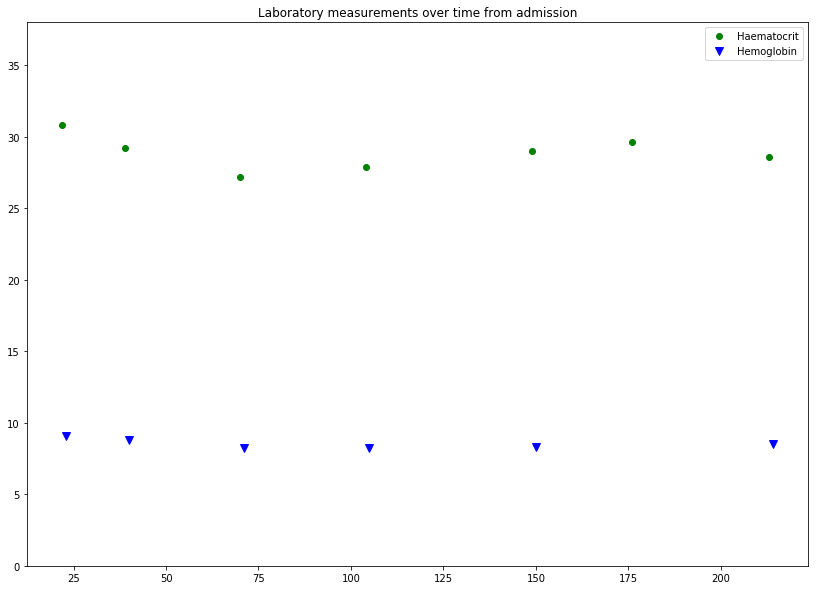

In [176]:
plt.figure(figsize=(14, 10))

plt.plot(le.index[le.LABEL=='HEMATOCRIT'], 
         le.VALUENUM[le.LABEL=='HEMATOCRIT'], 
         'go', markersize=6, label='Haematocrit')

plt.plot(le.index[le.LABEL=='HEMOGLOBIN'], 
         le.VALUENUM[le.LABEL=='HEMOGLOBIN'], 
         'bv', markersize=8, label='Hemoglobin')

plt.title('Laboratory measurements over time from admission')
plt.ylim(0,38)
plt.legend()

# PART 2: Building a predictive model

- Since the MIMIC demo dataset only contains data from 8 patients, all non-survivors, this dataset is not suitable to build mortality prediction models.
- Instead, let's try something with the available data: can we predict SpO2 given arterial pO2 and mean blood pressure?
- First, let’s extract a suitable dataset. We’ll run 3 sub-queries (one for each feature) then combine them.


In [177]:
query = """

with t1 as -- all time steps
(

SELECT distinct de.subject_id
  , round((strftime('%s',de.charttime)-strftime('%s',ie.intime))/60.0/120.0) as HOURS
FROM chartevents de
INNER join icustays ie
ON de.subject_id = ie.subject_id
order by de.subject_id, charttime

), t2 as  -- po2
(
SELECT de.subject_id
  --, de.charttime
  , round((strftime('%s',de.charttime)-strftime('%s',ie.intime))/60.0/120.0+1) as HOURS
 -- , di.label, de.value
  ,de.valuenum as po2
  --, de.uom
FROM labevents de
INNER JOIN d_labitems di
  ON de.itemid = di.itemid
INNER join icustays ie
ON de.subject_id = ie.subject_id
where label = 'PO2'
order by de.subject_id, hours

), t3 as  -- spo2
(
with t1 as
(SELECT de.subject_id
  , round((strftime('%s',de.charttime)-strftime('%s',ie.intime))/60.0/120.0+1) as HOURS
  , de.valuenum
FROM chartevents de
INNER join d_items di
ON de.itemid = di.itemid
INNER join icustays ie
ON de.subject_id = ie.subject_id
WHERE label = 'O2 saturation pulseoxymetry'
ORDER BY charttime)
select subject_id, hours, avg(valuenum) as spo2
from t1
group by subject_id, hours
order by subject_id, hours
), t4 as -- map
(
with t1 as
(SELECT de.subject_id
  , round((strftime('%s',de.charttime)-strftime('%s',ie.intime))/60.0/120.0+1) as HOURS
  , de.valuenum
FROM chartevents de
INNER join d_items di
ON de.itemid = di.itemid
INNER join icustays ie
ON de.icustay_id = ie.icustay_id
WHERE label = 'Non Invasive Blood Pressure mean'
ORDER BY charttime)
select subject_id, hours, avg(valuenum) as map
from t1
group by subject_id, hours
order by subject_id, hours

)

select t1.*, t2.po2 as po2,t4.map as map, t3.spo2 as spo2
from t1, t2, t3, t4
where t1.subject_id=t2.subject_id and t1.subject_id=t3.subject_id   and t1.subject_id=t4.subject_id   and t4.hours>=t1.hours-2 and t4.hours<=t1.hours+2  and t2.hours>=t1.hours-2  and t2.hours<=t1.hours+2 and t1.hours=t3.hours"""
    
# Run the query  
uo = pd.read_sql_query(query,conn)

# Save the correct columns into X (input) and Y (output) variables
X=uo.drop('subject_id', axis = 1)
X=X.drop('HOURS',axis=1)
Y=uo.spo2
# Save the name of the column headers 
feature_list = list(X.columns)
# Visualise the dataset created 
uo.head()
   

,subject_id,HOURS,po2,map,spo2
0,40004,2.0,165.0,100.0,100.0
1,40004,2.0,165.0,88.5,100.0
2,40004,2.0,165.0,90.5,100.0
3,40004,2.0,526.0,100.0,100.0
4,40004,2.0,526.0,88.5,100.0


It is good practice to train and test any statistical model on separate data, otherwise the model performance may be overestimated. So, let’s split the dataset into training and testing set.


In [178]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
Xtrain, Xtest, Ytrain , Ytest = train_test_split(X,Y, test_size = 0.2, random_state = 1)

print('Training Features Shape:', Xtrain.shape)
print('Training Labels Shape:', Ytrain.shape)
print('Testing Features Shape:', Xtest.shape)
print('Testing Labels Shape:', Ytest.shape)


Training Features Shape: (583, 3)
Training Labels Shape: (583,)
Testing Features Shape: (146, 3)
Testing Labels Shape: (146,)


Now that we’ve prepared the data, let’s build the predictive model. We’ll be using a random forest model, and learn the relationship between input data (pO2 and MAP) and the output (SpO2). Then, we’ll try the model on the test data.

In [179]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import roc_auc_score
#from sklearn.neighbors  import KNeighborsClassifier
#from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import matplotlib

# Build a random forest classifier
rf = RandomForestClassifier()
rf.fit(Xtrain,Ytrain.astype('int'))

# Use the random forest predict method on the test data
predictions = rf.predict(Xtest)


Let’s assess the performance of the model we built. We can measure the absolute error between actual and predicted values, and the mean absolute percentage error (MAPE).

In [180]:
# Calculate the absolute errors
errors = abs(predictions - Ytest)
print('Mean Absolute Error:', round(np.mean(errors), 2), '% of SpO2')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Ytest)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')



Mean Absolute Error: 0.43 % of SpO2
Accuracy: 99.56 %.


#### Plot 6: Actual versus predicted values.

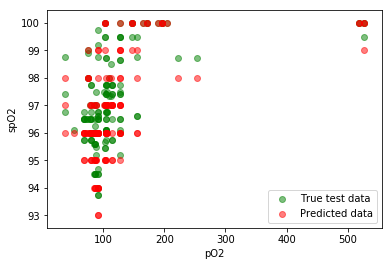

In [181]:
# Plot actual versus predicted values
plt.scatter(Xtest.po2, Ytest, c="g", alpha=0.5, label="True test data")
plt.scatter(Xtest.po2, predictions, c="r", alpha=0.5, label="Predicted data")

plt.xlabel("pO2")
plt.ylabel("spO2")
plt.legend(loc=4)
plt.show()


# Conclusion

This concludes our workshop. To summarise, we gained insight into MIMIC-III, the publicly accessible critical care database. We explored raw patient data with SQL queries, extracted and analysed the data of a single patient and built a simple predictive model.

If after this workshop you would like to gain access to the full MIMIC-III dataset, which contains rich data for over 40,000 patients, please see: https://mimic.physionet.org/gettingstarted/access/